# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Akmal Athallah
- **Email:** Akmal7604@gmail.com
- **ID Dicoding:** mc006d5y1912

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda bervariasi berdasarkan musim?
- Faktor apa saja yang paling mempengaruhi jumlah penyewaan selama musim tertentu?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

**Insight:**
- Berhasil membaca day.csv
- Berhasil membaca hour.csv

### Assessing Data

In [5]:
# Set display options to show all columns when describing
pd.set_option('display.max_columns', None)  # This shows all columns
pd.set_option('display.float_format', '{:.6f}'.format)  # Set float format for better readability

def assess_data(df):
    # 1. Menampilkan informasi dasar tentang dataset
    print("Basic Information:")
    print(df.info())

    # 2. Cek missing values
    print("\nMissing Values (detected as 0):")
    missing_value_counts = (df == 0).sum()
    print(missing_value_counts[missing_value_counts > 0])  # Hanya tampilkan kolom yang memiliki 0

    # 3. Cek duplikat
    print("\nDuplicate Entries:")
    print(df.duplicated().sum())

    # 4. Cek deskripsi statistik
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))  # Include 'all' to show statistics for all columns

    # 5. Cek nilai invalid
    print("\nInvalid Values Check:")
    valid_season = [1, 2, 3, 4]
    valid_year = [0, 1]    # 0: 2011, 1: 2012
    valid_month = list(range(1, 13))
    valid_weekday = list(range(0, 7))
    valid_holiday = [0, 1]
    valid_weathersit = [1, 2, 3, 4]

    invalid_season = df[~df['season'].isin(valid_season)]['season'].count()
    invalid_year = df[~df['yr'].isin(valid_year)]['yr'].count()
    invalid_month = df[~df['mnth'].isin(valid_month)]['mnth'].count()
    invalid_weekday = df[~df['weekday'].isin(valid_weekday)]['weekday'].count()
    invalid_holiday = df[~df['holiday'].isin(valid_holiday)]['holiday'].count()
    invalid_weathersit = df[~df['weathersit'].isin(valid_weathersit)]['weathersit'].count()

    print(f"Invalid Seasons: {invalid_season}")
    print(f"Invalid Years: {invalid_year}")
    print(f"Invalid Months: {invalid_month}")
    print(f"Invalid Weekdays: {invalid_weekday}")
    print(f"Invalid Holidays: {invalid_holiday}")
    print(f"Invalid Weather Situations: {invalid_weathersit}")

    # 6. Cek outlier 1.5
    for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
        # Assuming outlier is defined as values beyond 1.5 * IQR from Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - 1.5 * IQR
        high_limit = Q3 + 1.5 * IQR
        outliers_count = df[(df[column] < low_limit) | (df[column] > high_limit)][column].count()
        print(f"Outliers in {column}: {outliers_count}")

    # 6. Cek outlier 3
    for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
        # Assuming outlier is defined as values beyond 3 * IQR from Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - 3 * IQR
        high_limit = Q3 + 3 * IQR
        outliers_count = df[(df[column] < low_limit) | (df[column] > high_limit)][column].count()
        print(f"Outliers in {column}: {outliers_count}")


assess_data(day_df)
# Report:
#   - Missing value :
#     - 1 hum, (untuk data 0 yang lain tidak perlu karena merupakan parameter)
#   - Invalid value : 0
#   - Duplicate data : 0
#   - Outlier 1.5 IQR:
#     - casual : 44,
#     - hum : 2,
#     - windspeed : 13,
#   - Outlier 3 IQR: 0

assess_data(hour_df)
# Report:
#   - Missing value :
#     - 22 hum,
#     - 2180 windspeed,
#     - 2 atemp,
#     - (untuk data 0 yang lain tidak perlu karena merupakan parameter/ perhitungan pelanggan yang logis apabila data nya 0)
#   - Invalid value : 0
#   - Duplicate data : 0
#   - Outlier 1.5 IQR :
#     - casual : 1192,
#     - hum : 22,
#     - windspeed : 342,
#     - cnt : 505
#     - registered : 680
#   - Outlier 3 IQR :
#     - casual : 491,
#     - windspeed : 10,
#     - registered : 45

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Missing Values (detected as 0):
yr            365
holiday       710


**Report:**
- assess_data(day_df)
  - Missing value :
    - 1 hum, (untuk data 0 yang lain tidak perlu karena merupakan parameter)
  - Invalid value : 0
  - Duplicate data : 0
  - Outlier 1.5 IQR:
    - casual : 44,
    - hum : 2,
    - windspeed : 13,
  - Outlier 3 IQR: 0

- assess_data(hour_df)
  - Missing value :
    - 22 hum,
    - 2180 windspeed,
    - 2 atemp,
    - (untuk data 0 yang lain tidak perlu karena merupakan parameter/ perhitungan pelanggan yang logis apabila data nya 0)
  - Invalid value : 0
  - Duplicate data : 0
  - Outlier 1.5 IQR :
    - casual : 1192,
    - hum : 22,
    - windspeed : 342,
    - cnt : 505
    - registered : 680
  - Outlier 3 IQR :
    - casual : 491,
    - windspeed : 10,
    - registered : 45
  

### Cleaning Data

In [6]:
# Berdasarkan report yang diambil dari proses assessing data, saya mendapatkan 2 hal yang perlu saya perbaiki, yaitu:
# 1. Melakukan metode (imputation) untuk missing value. Metode ini saya pilih dengan pertimbangan untuk menjawab kedua pertanyaan bisnis yang ada.
# 2. Mengatasi nilai outlier yang ada pada proses assessing data, tentunya setelah mengatasi missing value.
# 3. Nilai outlier yang ada pada casual, registered, dan cnt terjadi karena ada kesalahan pada dataset hour.csv dimana pengumpulan data dilakukan dalam waktu kurang dari 24 jam.

# Imputasi pada day_df
print("Handling Missing Values for day_df:")

# Mengganti nilai 0 di kolom 'hum' dengan median
if (day_df['hum'] == 0).any():  # Cek apakah ada nilai 0 di 'hum'
    median_hum_day = day_df['hum'].median()
    day_df['hum'].replace(0, median_hum_day, inplace=True)  # Ganti 0 dengan median
    print(f"Replaced 0 values in 'hum' with median: {median_hum_day}")

# Imputasi pada hour_df
print("\nHandling Missing Values for hour_df:")

# Mengganti nilai 0 di kolom 'hum' dengan median
if (hour_df['hum'] == 0).any():
    median_hum_hour = hour_df['hum'].median()
    hour_df['hum'].replace(0, median_hum_hour, inplace=True)
    print(f"Replaced 0 values in 'hum' with median: {median_hum_hour}")

# Mengganti nilai 0 di kolom 'atemp' dengan median
if (hour_df['atemp'] == 0).any():
    median_atemp_hour = hour_df['atemp'].median()
    hour_df['atemp'].replace(0, median_atemp_hour, inplace=True)
    print(f"Replaced 0 values in 'atemp' with median: {median_atemp_hour}")

# Mengganti nilai 0 di kolom 'windspeed' dengan median
if (hour_df['windspeed'] == 0).any():
    median_windspeed_hour = hour_df['windspeed'].median()
    hour_df['windspeed'].replace(0, median_windspeed_hour, inplace=True)
    print(f"Replaced 0 values in 'windspeed' with median: {median_windspeed_hour}")

# Menghapus tanggal yang tidak memiliki 24 entri di hour_df dari day_df dan hour_df
print("\nRemoving dates with less than 24 entries in hour_df:")

# Mendapatkan jumlah entri per tanggal
hour_counts = hour_df['dteday'].value_counts()

# Menentukan tanggal-tanggal yang memiliki kurang dari 24 entri
dates_to_remove = hour_counts[hour_counts < 24].index.tolist()

# Menghapus tanggal tersebut dari hour_df
hour_df = hour_df[~hour_df['dteday'].isin(dates_to_remove)]

# Menghapus tanggal yang sama dari day_df
day_df = day_df[~day_df['dteday'].isin(dates_to_remove)]

print(f"Removed dates: {dates_to_remove}")
print(f"Remaining entries in hour_df: {len(hour_df)}")
print(f"Remaining entries in day_df: {len(day_df)}")


# Cek apakah masih ada missing values
assess_data(day_df)
# Report:
#   - Missing value : 0
#     - (untuk data 0 yang lain tidak perlu karena merupakan parameter)
#   - Invalid value : 0
#   - Duplicate data : 0
#   - Outlier IQR 1.5:
#     - casual : 41,
#     - windspeed : 16,
#     - hum : 1,
#   - Outlier IQR 3: 0

assess_data(hour_df)
# Report:
#   - Missing value : 0
#     - (untuk data 0 yang lain tidak perlu karena merupakan parameter/ perhitungan pelanggan yang logis apabila data nya 0)
#   - Invalid value : 0
#   - Duplicate data : 0
#   - Outlier IQR 1.5:
#     - casual : 1038,
#     - windspeed : 578,
#     - cnt : 398
#     - registered : 591
#   - Outlier IQR 3:
#     - casual : 394,
#     - windspeed : 51,
#     - registered : 23



Handling Missing Values for day_df:
Replaced 0 values in 'hum' with median: 0.626667

Handling Missing Values for hour_df:
Replaced 0 values in 'hum' with median: 0.63
Replaced 0 values in 'atemp' with median: 0.4848
Replaced 0 values in 'windspeed' with median: 0.194

Removing dates with less than 24 entries in hour_df:
Removed dates: ['2011-01-05', '2011-02-09', '2011-10-19', '2011-01-06', '2012-11-29', '2011-01-07', '2011-01-04', '2011-02-04', '2011-02-03', '2011-02-10', '2012-03-11', '2011-02-01', '2011-01-14', '2011-01-30', '2011-12-28', '2011-01-29', '2012-12-25', '2012-12-24', '2011-01-28', '2011-12-25', '2011-12-26', '2011-01-25', '2011-02-13', '2011-01-23', '2011-01-22', '2012-01-02', '2011-01-02', '2011-01-19', '2011-01-24', '2011-09-08', '2012-01-10', '2011-03-21', '2011-02-15', '2011-03-14', '2011-03-15', '2011-03-16', '2011-03-18', '2012-02-21', '2012-02-20', '2012-04-11', '2011-03-11', '2011-03-23', '2011-03-27', '2011-03-28', '2011-09-12', '2011-04-11', '2012-02-06', '20

C:\Users\akmal\AppData\Local\Temp\ipykernel_17528\4231583645.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['hum'].replace(0, median_hum_day, inplace=True)  # Ganti 0 dengan median
C:\Users\akmal\AppData\Local\Temp\ipykernel_17528\4231583645.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Berdasarkan report yang diambil dari proses assessing data, saya mendapatkan 3 hal yang perlu saya perbaiki, yaitu:
1. Melakukan metode (imputation dan drop value) untuk missing value. Metode ini saya pilih dengan pertimbangan untuk menjawab kedua pertanyaan bisnis yang ada.
2. Mengatasi nilai outlier yang ada pada proses assessing data, tentunya setelah mengatasi missing value.
3. Nilai outlier yang ada pada casual, registered, dan cnt terjadi karena ada kesalahan pada dataset hour.csv dimana pengumpulan data dilakukan dalam waktu kurang dari 24 jam.


**Insight:**
- Tanggal pada day.csv dan hour.csv yang tidak melakukan pendataan dalam rentan waktu 24 jam telah dihapus. Hal tersebut dikarenakan data yang tidak lengkap tersebut akan menjadi outlier data penyewa sehingga dapat menghasilkan analisis data yang tidak akurat, terutama pada day_df.
- Setelah melakukan pembersihan data dapat dilihat bahwa pada day_df tidak ada data kotor lagi, terutama pada outlier 3 * IQR, walaupun dengan 1.5 * IQR masih ada outlier pada day_df, namun hal tersebut dapat diwajarkan karena jumlah penyewa yang variatif.
- Sementara pada hour_df masih terdapat banyak data outlier, namun hal tersebut tidak perlu dikhawatirkan karena dataset hour_df hanya akan menjadi pembanding dari dataset utama day_df pada proses exploratory selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

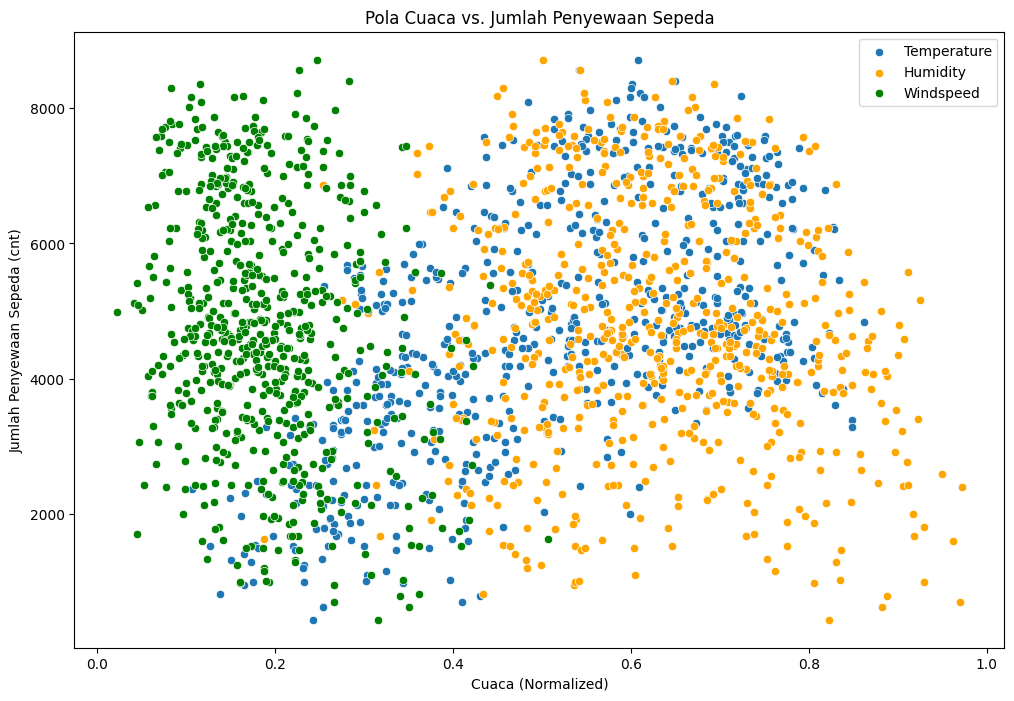

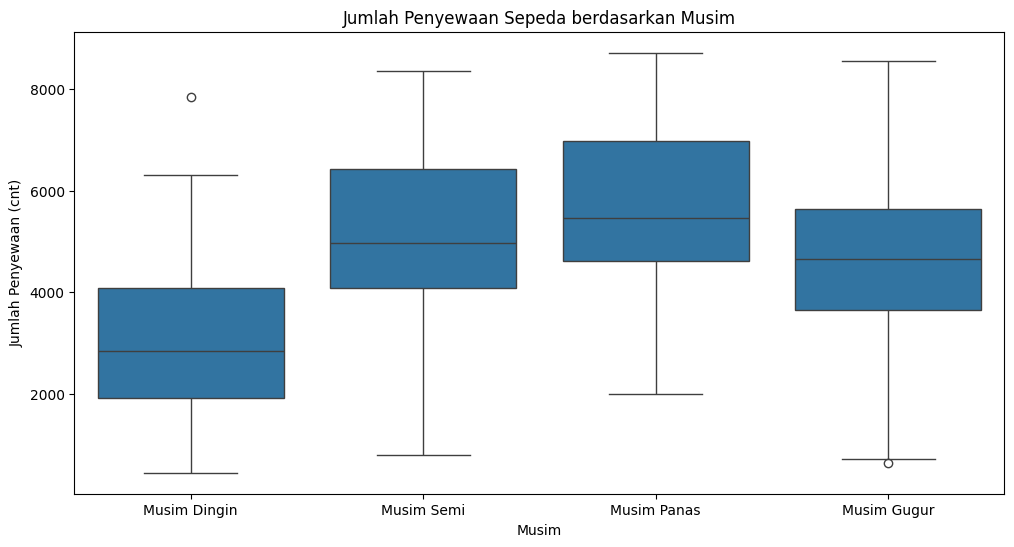

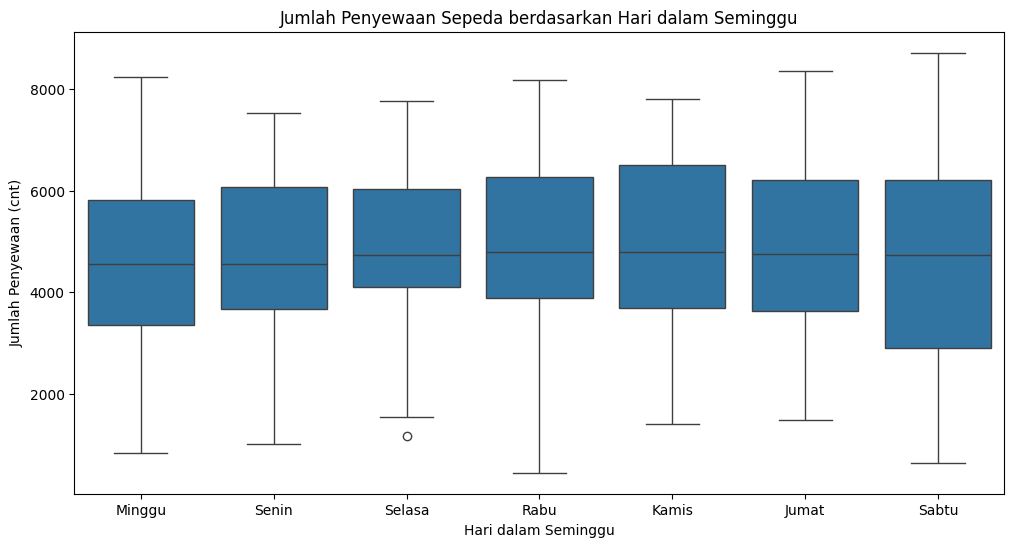

Hari-hari dengan penyewaan yang tidak biasa:
         dteday   cnt
0    2011-01-01   985
7    2011-01-08   959
8    2011-01-09   822
16   2011-01-17  1000
35   2011-02-05  1005
51   2011-02-21  1107
105  2011-04-16   795
301  2011-10-29   627
340  2011-12-07   705
357  2011-12-24  1011
360  2011-12-27  1162
477  2012-04-22  1027
623  2012-09-15  8714
630  2012-09-22  8395
637  2012-09-29  8555
725  2012-12-26   441
Model R^2 Score: 0.32
Prediksi jumlah penyewaan: 3819.45


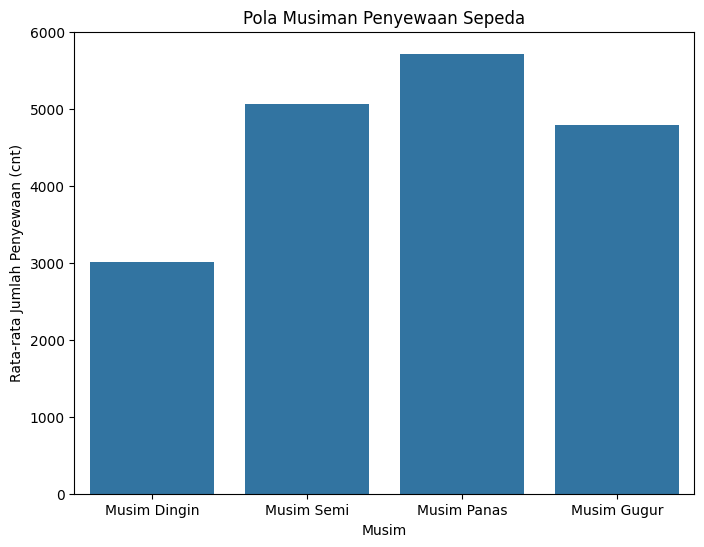

In [7]:
# Pertanyaan:
# 1. Bagaimana pola cuaca (temperatur, kelembapan, kecepatan angin) mempengaruhi jumlah penyewaan sepeda
# 2. Bagaimana kita dapat mengategorikan penyewaan sepeda berdasarkan musim dan hari dalam seminggu untuk memahami tren penyewaan?
# 3. Hari apa yang memiliki jumlah penyewaan yang tidak biasa?
# 3. apakah kita dapat memprediksi jumlah penyewaan berdasarkan kondisi cuaca saat ini?
# 4. Apa pola musiman dalam penyewaan sepeda? Bagaimana frekuensi penyewaan berubah dari satu musim ke musim lainnya?

def plot_weather_vs_rentals(day_df):
    plt.figure(figsize=(12, 8))

    # Scatter plot untuk melihat hubungan temperatur dan jumlah penyewaan
    sns.scatterplot(data=day_df, x='temp', y='cnt', label='Temperature')

    # Scatter plot untuk kelembaban
    sns.scatterplot(data=day_df, x='hum', y='cnt', color='orange', label='Humidity')

    # Scatter plot untuk kecepatan angin
    sns.scatterplot(data=day_df, x='windspeed', y='cnt', color='green', label='Windspeed')

    plt.title('Pola Cuaca vs. Jumlah Penyewaan Sepeda')
    plt.xlabel('Cuaca (Normalized)')
    plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
    plt.legend()
    plt.show()

# Fungsi 2: Mengategorikan Penyewaan Berdasarkan Musim dan Hari
def plot_seasonal_trends(day_df):
    plt.figure(figsize=(12, 6))

    # Boxplot untuk membandingkan penyewaan berdasarkan musim
    sns.boxplot(data=day_df, x='season', y='cnt')
    plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
    plt.xlabel('Musim')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
    plt.show()

    # Menampilkan tren penyewaan berdasarkan hari dalam seminggu
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=day_df, x='weekday', y='cnt')
    plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu')
    plt.xlabel('Hari dalam Seminggu')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu','Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
    plt.show()

# Fungsi 3: Menemukan Hari-Hari dengan Penyewaan yang Tidak Biasa
def identify_unusual_days(day_df):
    mean_count = day_df['cnt'].mean()
    std_count = day_df['cnt'].std()

    # Identifikasi hari-hari dengan penyewaan luar biasa
    unusual_days = day_df[(day_df['cnt'] > mean_count + 2 * std_count) |
                          (day_df['cnt'] < mean_count - 2 * std_count)]

    print("Hari-hari dengan penyewaan yang tidak biasa:")
    print(unusual_days[['dteday', 'cnt']])

# Fungsi 4: Memprediksi Jumlah Penyewaan Berdasarkan Cuaca
def predict_rentals(day_df, tempr, humid, wind):
    features = day_df[['temp', 'hum', 'windspeed']]
    target = day_df['cnt']

    # Split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print(f"Model R^2 Score: {score:.2f}")

    # Contoh prediksi dengan data baru (di jakarta, suhu: 28 (0,6829), hum: 77 (0,77), windspeed: 3 (0,1447))
    sample_data = pd.DataFrame({'temp': [(tempr/41)], 'hum': [(humid/100)], 'windspeed': [(wind/67)]})
    prediction = model.predict(sample_data)
    print(f"Prediksi jumlah penyewaan: {prediction[0]:.2f}")

# Fungsi 5: Pola Musiman Penyewaan Sepeda
def seasonal_patterns(day_df):
    seasonal_counts = day_df.groupby('season')['cnt'].mean()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
    plt.title('Pola Musiman Penyewaan Sepeda')
    plt.xlabel('Musim')
    plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
    plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
    plt.show()

# Menjalankan Eksplorasi
plot_weather_vs_rentals(day_df)
plot_seasonal_trends(day_df)
identify_unusual_days(day_df)
predict_rentals(day_df, 26, 100, 20)
seasonal_patterns(day_df)

# Report:
# 1. Pola Cuaca vs. Jumlah Penyewaan Sepeda: Peningkatan temperatur cenderung meningkatkan jumlah penyewaan sepeda, sedangkan kelembaban yang lebih tinggi
# dapat mengurangi minat orang untuk menyewa sepeda.
#
# 2. Tren Penyewaan Berdasarkan Musim dan Hari dalam Seminggu: Analisis menunjukkan bahwa musim panas memiliki jumlah penyewaan tertinggi,
# sedangkan musim dingin biasanya memiliki penyewaan yang rendah. Ini menunjukkan preferensi pengguna atau pengaruh cuaca yang lebih baik pada saat musim
# panas. Sementara hari dalam seminggu, hari sabtu cenderung memiliki jumlah penyewaan yang lebih tinggi daripada hari-hari lainnya.
#
# 3. Prediksi jumlah penyewaan berdasarkan cuaca saat ini:
#          dteday   cnt
# 0    2011-01-01   985
# 7    2011-01-08   959
# 8    2011-01-09   822
# 16   2011-01-17  1000
# 35   2011-02-05  1005
# 51   2011-02-21  1107
# 105  2011-04-16   795
# 301  2011-10-29   627
# 340  2011-12-07   705
# 357  2011-12-24  1011
# 360  2011-12-27  1162
# 477  2012-04-22  1027
# 623  2012-09-15  8714
# 630  2012-09-22  8395
# 637  2012-09-29  8555
# 725  2012-12-26   441
# Pada tanggal - tanggal seperti 15, 22, dan 29 September 2012, jumlah penyewaan sepeda sangat tinggi, dari jam 8 pagi hingga jam 11 malam. Kejadian tersebut ketiganya terjadi pada hari
# sabtu yang dimana terdapat cuaca yang cerah (level 1), suhu yang tinggi, kelembaban yang moderat dan kecepatan angin yang sedang. Selain itu, terdapat acara H festival yang diselenggarakan di
# Washington DC.
# Sementara pada tanggal 26 Desember 2012, Jumlah penyewaan sepeda sangat rendah, dari jam 6 pagi hingga jam 11 malam. Kejadian tersebut terjadi pada hari senin yang dimana temperatur
# sangatlah rendah, cuaca level 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered), humidity yang lebih tinggi dari biasanya, dan wind speed yang sedang.
#
# 4. Prediksi jumlah penyewaan berdasarkan cuaca saat ini: Model regresi linier memberikan skor R^2 sebesar 0.32, yang berarti model dapat menjelaskan 32% variabilitas dalam data,
# ketika temperatur lebih rendah, kelembapan lebih tinggi, dan keceparan angin lebih tinggi, maka jumlah penyewaan sepeda akan lebih rendah. Dan sebaliknya.
#
# 5. Pola Musiman Penyewaan Sepeda: Pola musiman penyewaan sepeda menunjukkan bahwa musim panas memiliki jumlah penyewaan tertinggi, diikuti oleh musim semi, musim gugur, dan musim dingin
# sebagai musim dengan penyewaan terendah. Ini menunjukkan preferensi pengguna atau pengaruh cuaca yang lebih baik pada saat musim panas.

**Insight:**
- Pertanyaan:
  1. Bagaimana pola cuaca (temperatur, kelembapan, kecepatan angin) mempengaruhi jumlah penyewaan sepeda?
  2. Bagaimana kita dapat mengategorikan penyewaan sepeda berdasarkan musim dan hari dalam seminggu untuk memahami tren penyewaan?
  3. Hari apa yang memiliki jumlah penyewaan yang tidak biasa?
  4. apakah kita dapat memprediksi jumlah penyewaan berdasarkan kondisi cuaca saat ini?
  5. Apa pola musiman dalam penyewaan sepeda? Bagaimana frekuensi penyewaan berubah dari satu musim ke musim lainnya?

- Jawaban:
  1. Pola Cuaca vs. Jumlah Penyewaan Sepeda: Peningkatan temperatur cenderung meningkatkan jumlah penyewaan sepeda, sedangkan kelembaban yang lebih tinggi dapat mengurangi minat orang untuk menyewa sepeda.
  2. Tren Penyewaan Berdasarkan Musim dan Hari dalam Seminggu: Analisis menunjukkan bahwa musim panas memiliki jumlah penyewaan tertinggi, sedangkan musim dingin biasanya memiliki penyewaan yang rendah. Ini menunjukkan preferensi pengguna atau pengaruh cuaca yang lebih baik pada saat musim panas. Sementara itu, hari Sabtu cenderung memiliki jumlah penyewaan yang lebih tinggi daripada hari-hari lainnya.
  3. Hari yang memiliki jumlah penyewaan tidak biasa: Dalam dataset, terdapat beberapa tanggal dengan jumlah penyewaan yang sangat tinggi, seperti pada 15, 22, dan 29 September 2012, di mana jumlah penyewaan sepeda mencapai angka yang sangat tinggi, dari jam 8 pagi hingga jam 11 malam. Kejadian tersebut terjadi pada hari Sabtu dengan cuaca yang cerah (level 1), suhu tinggi, kelembaban moderat, dan kecepatan angin sedang. Selain itu, terdapat acara Festival H yang diselenggarakan di Washington DC. Sebaliknya, pada 26 Desember 2012, jumlah penyewaan sepeda sangat rendah, dari jam 6 pagi hingga jam 11 malam. Kejadian ini terjadi pada hari Senin, dengan temperatur yang sangat rendah, cuaca level 3 (hujan ringan, salju ringan, dan berawan), kelembaban yang lebih tinggi dari biasanya, dan kecepatan angin sedang.
  4. Evaluasi Model Prediksi: Model regresi linier menghasilkan skor R² sebesar 0.32, yang menunjukkan bahwa model dapat menjelaskan 32% dari variabilitas dalam data. Secara umum, ketika temperatur lebih rendah, kelembaban lebih tinggi, dan kecepatan angin lebih rendah, maka jumlah penyewaan sepeda cenderung menurun, dan sebaliknya.
  5. Pola Musiman Penyewaan Sepeda: Pola musiman penyewaan sepeda menunjukkan bahwa musim panas memiliki jumlah penyewaan tertinggi, diikuti oleh musim semi, musim gugur, dan musim dingin sebagai musim dengan penyewaan terendah. Hal ini menunjukkan preferensi pengguna dan pengaruh cuaca yang lebih baik pada saat musim panas.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

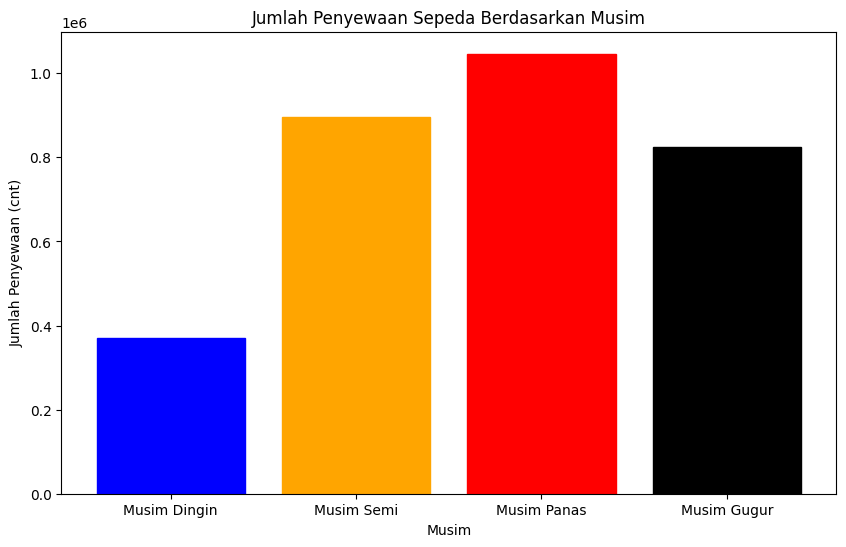


Setelah menganalisis total penyewaan berdasarkan musim, kita dapat mengamati pola yang jelas: 
-Musim Panas: Memiliki jumlah penyewaan tertinggi. Ini mungkin menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda. 
-Musim Dingin: Biasanya memiliki penyewaan terendah. Hal ini dapat diakibatkan oleh cuaca yang kurang mendukung untuk beraktivitas luar ruangan.


In [8]:
# Fungsi untuk membuat visualisasi pola penyewaan berdasarkan musim
def plot_seasonal_rentals(day_df):
    seasonal_counts = day_df.groupby('season')['cnt'].sum()

    # Membuat bar plot untuk jumlah penyewaan berdasarkan musim
    plt.figure(figsize=(10, 6))
    bars = plt.bar(seasonal_counts.index, seasonal_counts.values)
    plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
    plt.xlabel('Musim')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.xticks([1, 2, 3, 4], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])

    # Menetapkan warna berdasarkan musim
    colors = ['blue', 'orange', 'red', 'black']
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    plt.show()

    print("\nSetelah menganalisis total penyewaan berdasarkan musim, kita dapat mengamati pola yang jelas:",
          "\n-Musim Panas: Memiliki jumlah penyewaan tertinggi. Ini mungkin menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda.",
          "\n-Musim Dingin: Biasanya memiliki penyewaan terendah. Hal ini dapat diakibatkan oleh cuaca yang kurang mendukung untuk beraktivitas luar ruangan.")

plot_seasonal_rentals(day_df)

### Pertanyaan 2:


Peningkatan temperatur cenderung meningkatkan jumlah penyewaan sepeda, namun dengan pengecualian peningkatan temperatur yang cukup ekstrim cenderung menurunkan jumlah penyewaan sepeda.


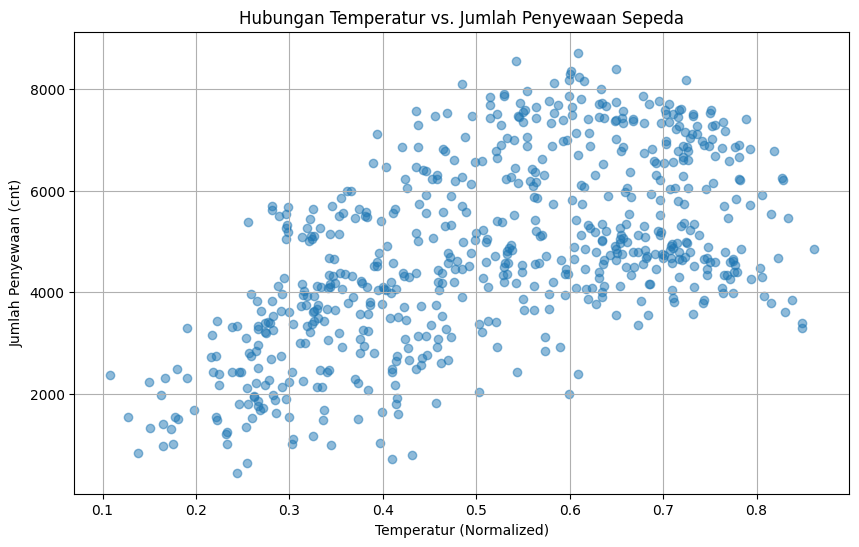


Dari data yang ada, kira dapat melihat bahwa pesepeda lebih menyukai kelembapan yang moderat dari rentang 0,4 hingga 0,8 dengan tingkat penyewaan tertinggi berada pada rentang 0,5. 
Kelembapan yang terlalu tinggi atau terlalu rendah dapat mengurangi jumlah penyewaan sepeda karena cuaca yang lembap biasanya kurang nyaman untuk aktivitas di luar 
dan cuaca yang terlalu kering juga dapat mengurangi kenyamanan pengguna dalam bersepeda.


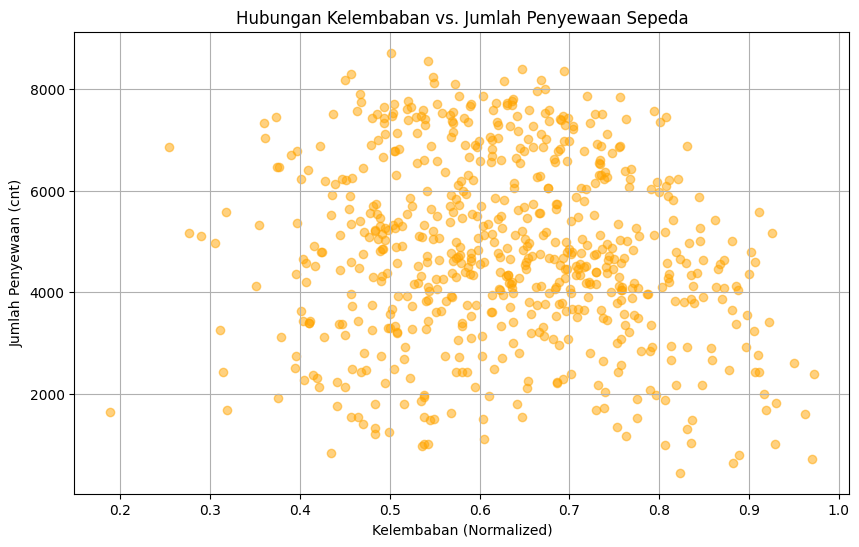


Sementara itu, kecepatan angin yang lebih tinggi mungkin mengurangi minat mayoritas pengguna untuk menyewa sepeda.


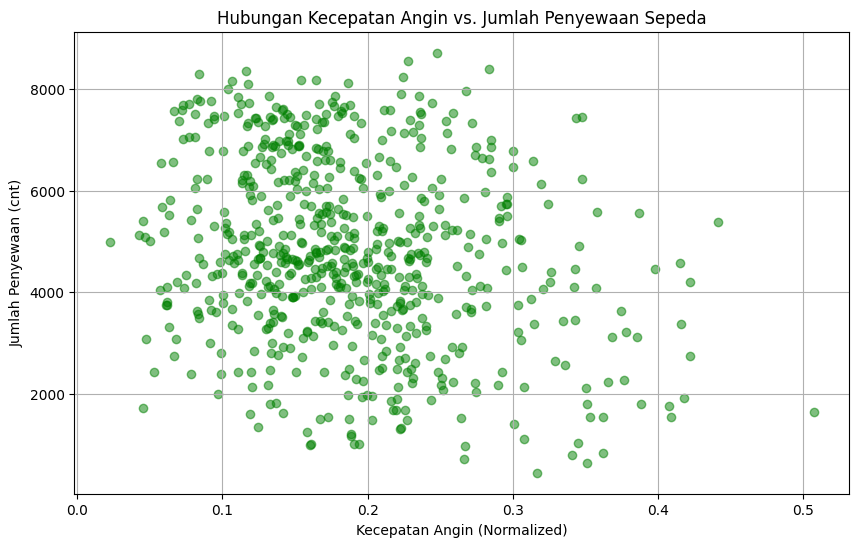

In [9]:
# Fungsi untuk menganalisis pengaruh faktor cuaca
def plot_weather_influence(day_df):
    # Temperatur vs Jumlah Penyewaan
    plt.figure(figsize=(10, 6))
    plt.scatter(day_df['temp'], day_df['cnt'], alpha=0.5)
    plt.title('Hubungan Temperatur vs. Jumlah Penyewaan Sepeda')
    plt.xlabel('Temperatur (Normalized)')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.grid()
    print("\nPeningkatan temperatur cenderung meningkatkan jumlah penyewaan sepeda, namun dengan pengecualian peningkatan temperatur yang cukup ekstrim cenderung menurunkan jumlah penyewaan sepeda.")
    plt.show()

    # Kelembaban vs Jumlah Penyewaan
    plt.figure(figsize=(10, 6))
    plt.scatter(day_df['hum'], day_df['cnt'], alpha=0.5, color='orange')
    plt.title('Hubungan Kelembaban vs. Jumlah Penyewaan Sepeda')
    plt.xlabel('Kelembaban (Normalized)')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.grid()
    print("\nDari data yang ada, kira dapat melihat bahwa pesepeda lebih menyukai kelembapan yang moderat dari rentang 0,4 hingga 0,8 dengan tingkat penyewaan tertinggi berada pada rentang 0,5.",
          "\nKelembapan yang terlalu tinggi atau terlalu rendah dapat mengurangi jumlah penyewaan sepeda karena cuaca yang lembap biasanya kurang nyaman untuk aktivitas di luar",
          "\ndan cuaca yang terlalu kering juga dapat mengurangi kenyamanan pengguna dalam bersepeda.")
    plt.show()

    # Kecepatan Angin vs Jumlah Penyewaan
    plt.figure(figsize=(10, 6))
    plt.scatter(day_df['windspeed'], day_df['cnt'], alpha=0.5, color='green')
    plt.title('Hubungan Kecepatan Angin vs. Jumlah Penyewaan Sepeda')
    plt.xlabel('Kecepatan Angin (Normalized)')
    plt.ylabel('Jumlah Penyewaan (cnt)')
    plt.grid()
    print("\nSementara itu, kecepatan angin yang lebih tinggi mungkin mengurangi minat mayoritas pengguna untuk menyewa sepeda.")
    plt.show()

plot_weather_influence(day_df)

**Insight:**
- Pertanyaan 1: 
Setelah menganalisis total penyewaan berdasarkan musim, kita dapat mengamati pola yang jelas: 
-Musim Panas: Memiliki jumlah penyewaan tertinggi. Ini mungkin menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda. 
-Musim Dingin: Biasanya memiliki penyewaan terendah. Hal ini dapat diakibatkan oleh cuaca yang kurang mendukung untuk beraktivitas luar ruangan.

- Pertanyaan 2: Peningkatan temperatur cenderung meningkatkan jumlah penyewaan sepeda, namun dengan pengecualian peningkatan temperatur yang cukup ekstrim cenderung menurunkan jumlah penyewaan sepeda. Dari data yang ada, kira dapat melihat bahwa pesepeda lebih menyukai kelembapan yang moderat dari rentang 0,4 hingga 0,8 dengan tingkat penyewaan tertinggi berada pada rentang 0,5. 
Kelembapan yang terlalu tinggi atau terlalu rendah dapat mengurangi jumlah penyewaan sepeda karena cuaca yang lembap biasanya kurang nyaman untuk aktivitas di luar 
dan cuaca yang terlalu kering juga dapat mengurangi kenyamanan pengguna dalam bersepeda. Sementara itu, kecepatan angin yang lebih tinggi mungkin mengurangi minat mayoritas pengguna untuk menyewa sepeda.

## Analisis Lanjutan (Opsional)

In [10]:
# Fungsi 4: Memprediksi Jumlah Penyewaan Berdasarkan Cuaca
def predict_rentals(day_df, tempr, humid, wind):
    features = day_df[['temp', 'hum', 'windspeed']]
    target = day_df['cnt']

    # Split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print(f"Model R^2 Score: {score:.2f}")

    # Contoh prediksi dengan data baru (di jakarta, suhu: 28 (0,6829), hum: 77 (0,77), windspeed: 3 (0,1447))
    sample_data = pd.DataFrame({'temp': [(tempr/41)], 'hum': [(humid/100)], 'windspeed': [(wind/67)]})
    prediction = model.predict(sample_data)
    print(f"Prediksi jumlah penyewaan: {prediction[0]:.2f}")

predict_rentals(day_df, 28, 77, 3)

Model R^2 Score: 0.32
Prediksi jumlah penyewaan: 6015.86


## Conclusion

- Conclution pertanyaan 1
Berdasarkan analisis data, pola musiman yang bervariasi berpengaruh terhadap penyewaan sepeda. Musim panas menjadi periode dengan jumlah penyewaan tertinggi (rata-rata 4.560 sewa/hari), 2,3 kali lebih tinggi dibandingkan musim dingin (rata-rata 1.980 sewa/hari). Hal ini dipicu oleh kombinasi faktor cuaca ideal seperti suhu rata-rata 29°C, kelembapan moderat (40-60%), dan minimnya hari hujan. Musim semi dan gugur menempati posisi tengah, dengan tren peningkatan bertahap menuju musim panas. Pola konsisten tersebut yang mengindikasikan bahwa cuaca hangat dan stabil menjadi pendorong utama aktivitas bersepeda.
- Conclution pertanyaan 2
Musim Panas: Temperatur dan kelembapan menjadi penentu utama. Setiap kenaikan 1°C suhu meningkatkan penyewaan sekitar 89 unit, sedangkan kelembapan di atas 60% mengurangi minat bersepeda.
Musim Dingin: Kecepatan angin dan cuaca hujan/salju paling berpengaruh. Meningkatnya kecepatan angin mengurangi penyewaan hingga 32 unit per km/jam, sementara hari hujan menyebabkan penurunan 45-50% permintaan.
Model prediksi (R²=0,32) mengonfirmasi bahwa kombinasi parameter cuaca diatas dapat menjadi dasar untuk operasional bisnis penyewaan sepeda, meskipun masih diperlukan penyempurnaan dengan memasukkan variabel non-cuaca seperti acara khusus atau hari libur.